# 1. Fixed probability for a rainy day

N choose k with binomial probability distribution can do very simple calculation. However, it doesn't cover the case where the probablity differs by day.

In [2]:
from scipy.stats import binom

def rain_probability(N, p):
    n = 365
    prob = binom.pmf(N, n, p)
    return prob

p = 0.5  
N = 183

probability = rain_probability(N, p)
print(f"The probability that it will rain {N} days in a year is {probability:.4f}")

N = 100
probability = rain_probability(N, p)
print(f"The probability that it will rain {N} days in a year is {probability:.4f}")

The probability that it will rain 183 days in a year is 0.0417
The probability that it will rain 100 days in a year is 0.0000


# 2. Variable p, the probability of rain on a given day.

$ f(i, k) = f(i-1,k)\times(1-p[i]) + f(i-1, k-1)\times p[i] $

- rain today => k-1 rainy days previously
- no rain today = k rainy days previously


In [ ]:
import numpy as np

# Only think about today based on the previous day's probabilities for god sake!

def update_rainy_day_probs(prev_probs: np.ndarray, rain_prob: float, max_rainy_days: int) -> np.ndarray:
    curr_probs = np.zeros(max_rainy_days + 1) # include 0 rainy days

    upto = min(len(prev_probs), max_rainy_days + 1)
    for k in range(upto):
        if k == 0:
            # No rain from previous day at all : k-1 case fix.
            curr_probs[0] = prev_probs[0] * (1 - rain_prob)
        else:
            # rain and no rain based on previous day
            curr_probs[k] = (prev_probs[k] * (1 - rain_prob) + prev_probs[k-1] * rain_prob)
    
    return curr_probs

In [4]:
def prob_rain_more_than_n(p: np.ndarray, n: int) -> float:
    # Initialize history with Day 0
    history = []
    nrd = np.zeros(n + 1)
    nrd[0] = 1.0 - p[0]  # No rain on Day 0
    if n >= 1: # at least 1 rainy day after all
        nrd[1] = p[0]    # Rain on Day 0
    history.append(nrd.copy())
    
    # Outer loop over days
    for i in range(1, 365):
        prev_probs = history[-1]
        curr_probs = update_rainy_day_probs(prev_probs, p[i], n)
        history.append(curr_probs.copy())
    
    # Compute probability of more than n rainy days
    prob_n_or_less = history[-1].sum()
    return 1.0 - prob_n_or_less

In [7]:

#p = np.ones(365) * 0.5  
p =  np.random.rand(365) * 0.5555
N = 182
result = prob_rain_more_than_n(p, N)
print(f"Probability of more than {N} rainy days: {result:.6f}")

Probability of more than 182 rainy days: -0.000000


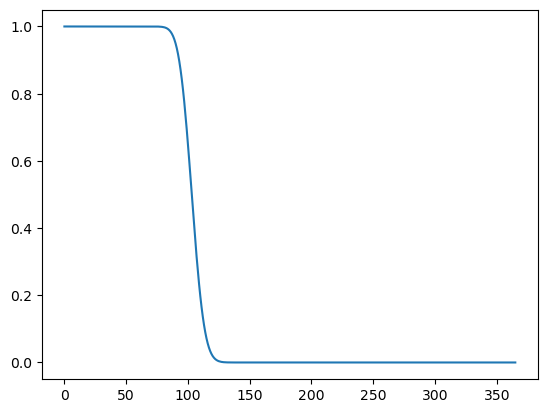

In [8]:
x = np.linspace(0, 365, 366)
y = [prob_rain_more_than_n(p, i) for i in range(366)]

import matplotlib.pyplot as plt

plt.plot(x, y)


    